# MDL ASSIGNMENT 2 



# Task 3 
A large multinational corporation recently underwent a round of layoffs, affecting
thousands of employees across different locations. The HR department wants to
understand why some employees were laid off while others were retained. They have the
data of the performance metric of the employees and the risk of them getting fired from
the company. In this task, you need to help the HR to find the bias and variance of a
trained model which can help her to analyse the risk factor of the employees.

# Task 3.1 :  How to Re-Sample data

The HR is given with two datasets, i.e, train set and test set, consisting of
pairs $(x_i ; y_i ).x_i $  corresponds to the performance score of the employee, while $y_i$
corresponds to the risk score of the employee. This data can be loaded into your python
program using the 𝑝𝑖𝑐𝑘𝑙𝑒. 𝑙𝑜𝑎𝑑() function. You then need to divide the train set into 20
equal parts randomly, so that you get 20 different train datasets to train your model.

In [2]:
import pickle # to save and load the model
from numpy import array, array_split, var, subtract, mean, square, unique, absolute # to calculate the variance
import matplotlib.pyplot as plt # to plot the data
import random # to generate random numbers
from sklearn.preprocessing import PolynomialFeatures # to create polynomial features
from sklearn.linear_model  import LinearRegression # to create the model
import pandas as pd     


In [3]:
TRAIN_FILE = 'data/train_dataset.pickle' 
TEST_FILE = 'data/test_dataset.pickle'
BATCH_SIZE = 20

In [4]:

def load_dataset(file):
    '''function to load the datase from the pickle file
    input: file name
    output: dataset
    '''

    with open(file, 'rb') as f:
        return pickle.load(f)
    
def split_dataset(dataset, batch_size):
    '''function to split the dataset into batches
    input: dataset, batch size
    output: batches
    '''
    return array_split(dataset, batch_size)

def split_into_features_labels(dataset):
    '''function to split the dataset into features and labels
    input: dataset
    output: features, labels
    '''
    x = [[d[0]] for d in dataset]
    y = [[d[1] ]for d in dataset]
    return x, y

In [5]:
train_dataset = load_dataset(TRAIN_FILE)
test_dataset = load_dataset(TEST_FILE)

# random.seed(82) # to make the results reproducible

random.seed(47)
random.shuffle(train_dataset)
train_datasets = split_dataset(train_dataset, BATCH_SIZE)
test_features, test_labels = split_into_features_labels(test_dataset)   
print('train dataset shape: ', train_dataset.shape)


train dataset shape:  (800, 2)


In [6]:
train_datasets_features = []
train_datasets_labels = []
for i in range(len(train_datasets)):
    features, labels = split_into_features_labels(train_datasets[i])
    train_datasets_features.append(features)
    train_datasets_labels.append(labels)
X = array(train_datasets_features)
Y = array(train_datasets_labels)

# print('X shape: ', X.shape)
# print(test_features)


# Task 3.2
After re-sampling the data, you have 21 different datasets (20 train sets and 1 test set).
Train a linear classifier on each of the 20 train sets separately so that you have 20
different classifiers or models. Now you can calculate the bias and variance of the model
using the test set. You need to repeat the above process for the following class of
functions, 
1. $$y = mx + c $$
2. $$y = bx^2 + cx + d$$
3. $$y = ax^3 + bx^2 + cx + d $$

and so on, up till polynomials of degree 15. The only two functions that you are
allowed to use are from ``` sklearn```:
*  ```linear model.LinearRegression().fit()```
* ```preprocessing.PolynomialFeatures()```

These functions will help you find the appropriate coefficients with the default
parameters. Tabulate the values of bias and variance and also write a detailed re-
port explaining how bias and variance change as you vary your function classes.

In [7]:
class Model(): 
    def __init__(self, degree , features , labels):
        self.degree = degree
        self.features = features
        self.labels = labels
        self.model = LinearRegression()
        if( degree > 1):
            self.poly = PolynomialFeatures(degree=degree)
            self.features = self.poly.fit_transform(self.features)
        
    def train(self):
        '''function to train the model'''
        self.model.fit(self.features, self.labels)

    def predict(self, features):
        '''function to predict the labels
        input: features
        output: labels
        '''
        if( self.degree > 1):
            features = self.poly.fit_transform(features)
        # print('degree: ', features.shape[1])
        self.predictions = self.model.predict(features)
        return self.predictions
        
    
    def get_variance(self, avg_predictions ):
        '''function to calculate the variance
        input: features, labels of the testing dataset 
        output: variance
        '''
        return  mean(square(subtract(self.predictions, avg_predictions)))
    
    def get_mse(self,  labels):
        '''function to calculate the bias
        input: features, labels of the testing dataset 
        output: bias
        '''
        return mean(square(subtract(self.predictions, labels)))
    
def get_bias(labels, avg_predictions):
    '''function to calculate the bias
    input: features, labels of the testing dataset 
    output: bias
    '''
    return ((subtract(avg_predictions, labels)))

    


# Task 4: Calculating Irreducible Error
Tabulate the values of irreducible error for the models in Task 2 and also write a detailed
report explaining why or why not the value of irreducible error changes as you vary your
class function.

In [8]:
BIASES = [] # bias
VARIANCES = [] # variance
MSE = [] # mean squared error
IRR = [] # irreducible error
BIASES_SQUARE = [] # bias^2
all_avg_predictions = []
for i in range(1, 16):
    all_predictions = []
    models = []
    bias_per_degree = []
    variance_per_degree = []
    mse_per_degree = []

    for j in range(20):
        model = Model(i, X[j], Y[j])
        model.train()
        models.append(model)
        predictions = model.predict(test_features)
        all_predictions.append(predictions)
        mse = model.get_mse(test_labels)
        mse_per_degree.append(mse)

    average_predictions = mean(all_predictions, axis=0)
    all_avg_predictions.append(average_predictions)
    for j in range(20):
        v = models[j].get_variance(average_predictions)
        variance_per_degree.append(v)

    bias = (get_bias(test_labels, average_predictions))
    BIASES.append(mean(bias))
    BIASES_SQUARE.append(mean(square(bias)))
    VARIANCES.append(mean(variance_per_degree))
    MSE.append(mean(mse_per_degree))
    

    
BIASES_SQUARE = array(BIASES_SQUARE)
VARIANCES = array(VARIANCES)
BIASES = array(BIASES)
MSE = array(MSE)
IRR = MSE -(BIASES_SQUARE + VARIANCES )


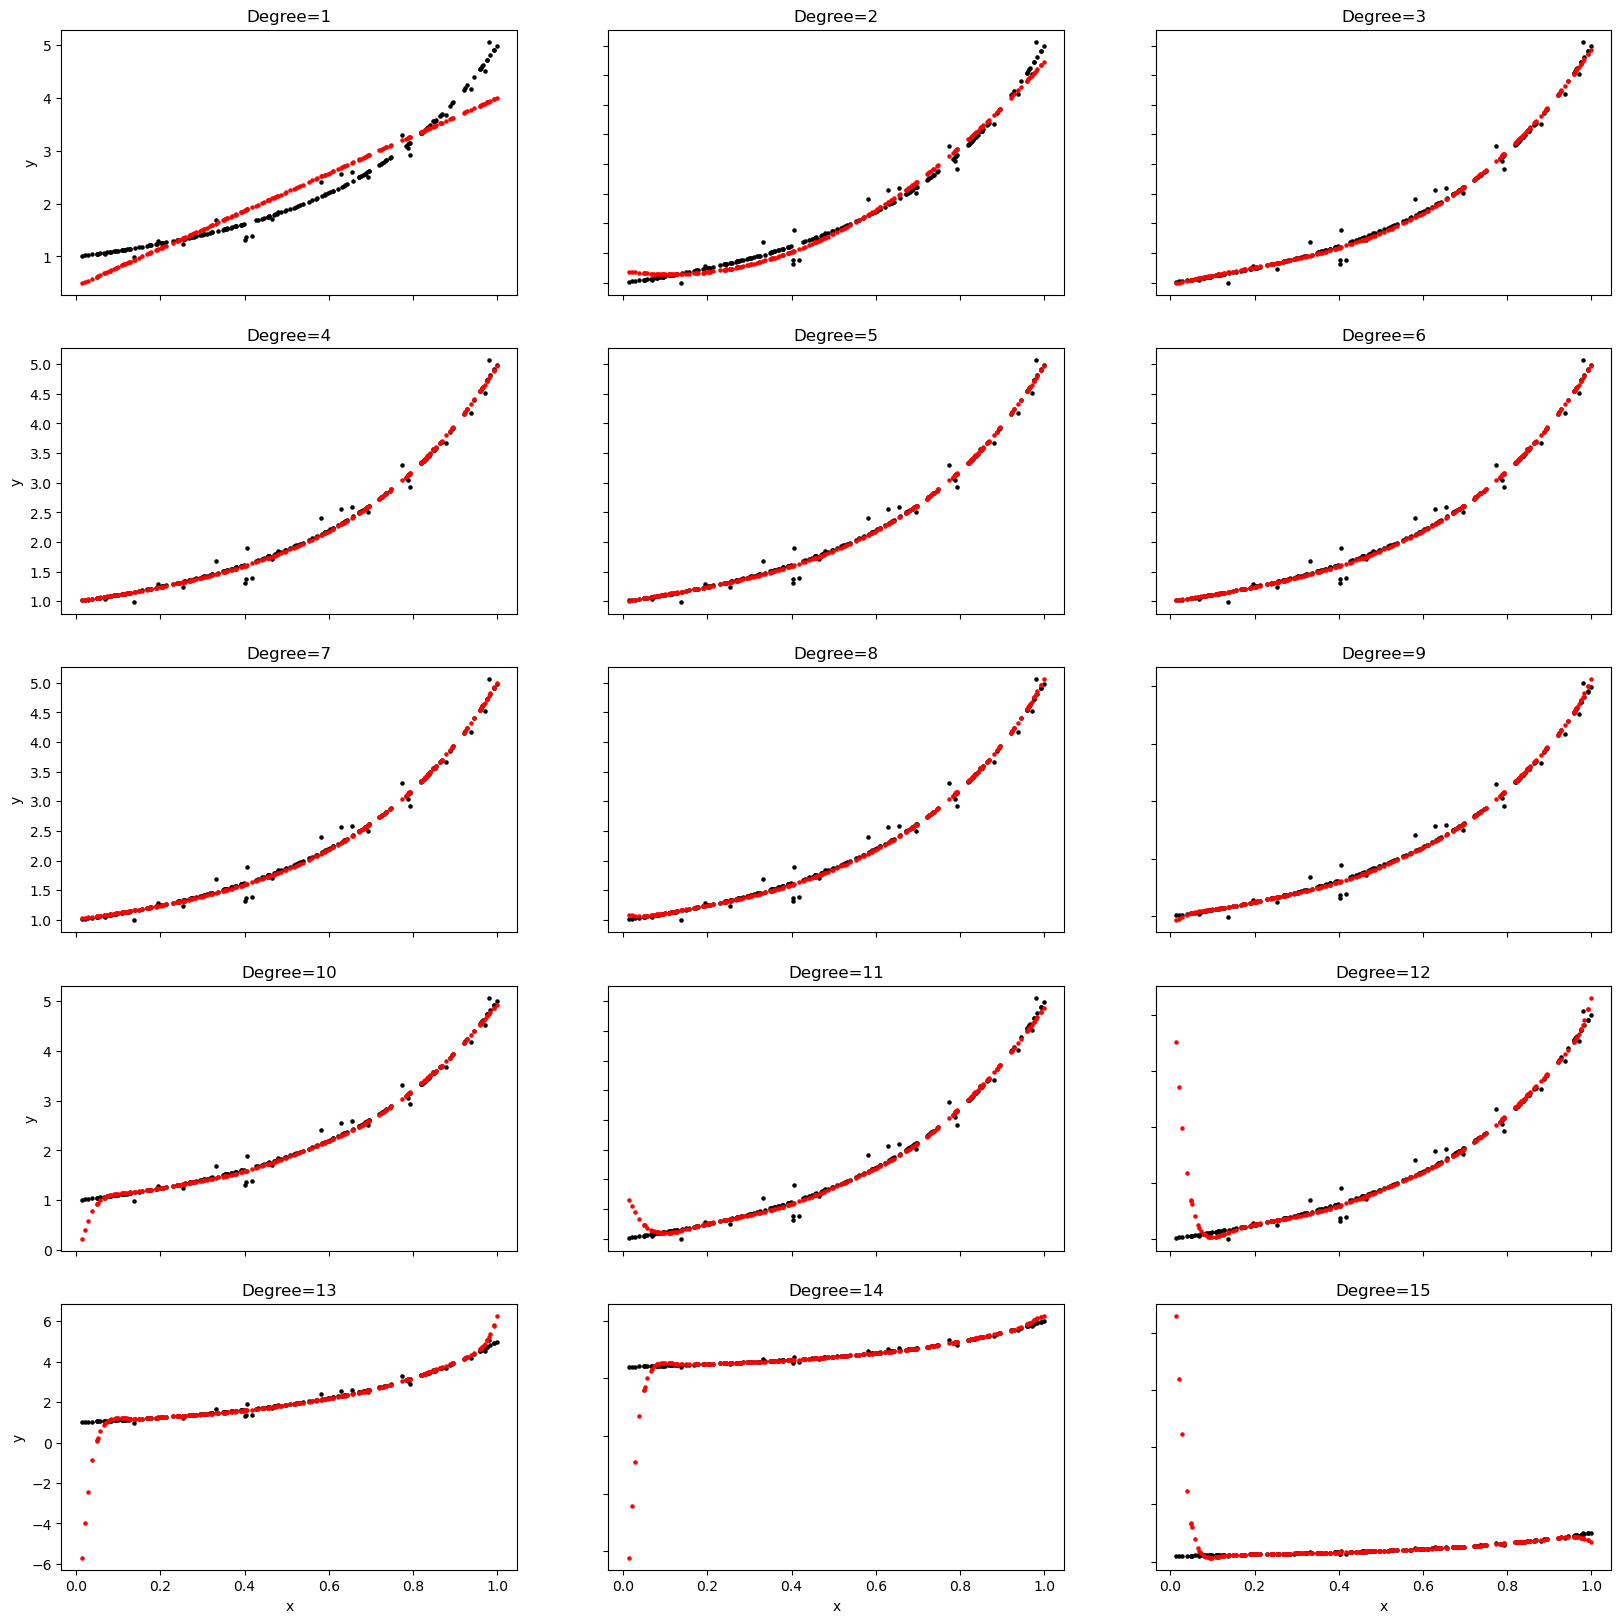

In [9]:

fig, axs= plt.subplots(5,3, figsize=(20,20))
for i in range(5):
    for j in range(3):
        
        axs[i,j].scatter(test_features, test_labels, color='black', label='Test set' , s=5)
        axs[i,j].scatter(test_features, all_avg_predictions[(3*i+j)], color='red' , label='Average prediction', s =5 )
        axs[i,j].set_title(f"Degree={i*3+j+1}")
        # legend to tell that the red points are the average of the 20 predictions
        # plt.legend([*[f"Training set {i+1}" for i in range(20)], "Test set", "Average prediction"], bbox_to_anchor=(1.05, 1), loc='upper left',  ncol=2)
        # axs.show()
for ax in axs.flat:
    ax.set(xlabel='x', ylabel='y')

for ax in axs.flat:
    ax.label_outer()


# Task 5: Plotting $Bias^2$ − $Variance$ graph
Based on the variance, bias and total error calculated in earlier tasks, plot the
$Bias^2−Variance$ tradeoff graph and write your observations in the report with respect to
underfitting, overfitting and also comment on the type of data just by analysing the
$Bias^2−Variance$ plot. The below figure shows the balance between model framework
error and model complexity<br>
<center>
<img src = 'img.png'
svg.png width = "500" height = "300" >
<br><br>
</center>
Plot variation of $Bias^2, Variance$ and $MSE $ against degree of polynomial in the same
graph

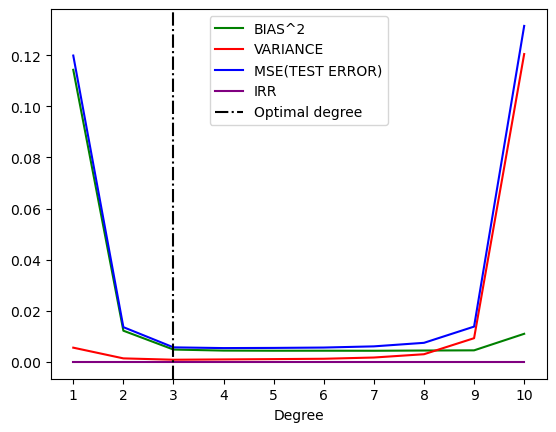

In [10]:
plt.plot(range(1,11), BIASES_SQUARE[:10], color='g', label='BIAS^2')
plt.plot(range(1,11), VARIANCES[:10], color='r', label='VARIANCE')
plt.plot(range(1,11), MSE[:10], color='b', label='MSE(TEST ERROR)')
plt.plot(range(1,11), IRR[:10], color='purple', label='IRR')
plt.axvline(x = list(MSE).index(min(MSE)), color = 'black', label = 'Optimal degree' , linestyle = "dashdot")
plt.xlabel('Degree')
plt.xticks(range(1,11))
plt.legend()
plt.show()


In [11]:
pd.DataFrame({'Degree': range(1,16), 'BIAS^2': BIASES_SQUARE, 'VARIANCE': VARIANCES, 'MSE(TEST ERROR)': MSE, 'IRR': IRR}).reset_index(drop=True)

,Degree,BIAS^2,VARIANCE,MSE(TEST ERROR),IRR
0,1,0.114267,0.005578,0.119845,2.775558e-17
1,2,0.012214,0.001386,0.013600,-1.734723e-18
2,3,0.004839,0.000856,0.005695,8.673617e-19
3,4,0.004435,0.000979,0.005414,1.734723e-18
4,5,0.004381,0.001100,0.005481,3.469447e-18
5,6,0.004386,0.001236,0.005623,8.673617e-19
6,7,0.004364,0.001722,0.006086,9.540979e-18
7,8,0.004462,0.003008,0.007470,3.469447e-18
8,9,0.004530,0.009285,0.013814,-1.734723e-18
9,10,0.010998,0.120438,0.131436,-2.775558e-17
